In [70]:
import tweepy
import matplotlib
import time
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
BEARER_TOKEN = ''

In [ ]:
client = tweepy.Client(bearer_token=BEARER_TOKEN, wait_on_rate_limit=True)

In [55]:
client = tweepy.Client(bearer_token=BEARER_TOKEN, wait_on_rate_limit=True)
neuropsy_tweets = []


for response in tweepy.Paginator(client.search_all_tweets, 
                                 query = 'Neuropsychology neuropsychology -is:retweet lang:en',
                                 user_fields = ['username', 'public_metrics', 'description', 'location'],
                                 tweet_fields = ['created_at', 'geo', 'public_metrics', 'text'],
                                 expansions = 'author_id',
                                 start_time = '2022-01-01T00:00:00Z',
                                 end_time = '2022-02-01T00:00:00Z',
                              max_results=500):
    time.sleep(1)
    neuropsy_tweets.append(response)

In [60]:
result = []
user_dict = {}
# Loop through each response object
for response in neuropsy_tweets:
    # Take all of the users, and put them into a dictionary of dictionaries with the info we want to keep
    for user in response.includes['users']:
        user_dict[user.id] = {'username': user.username, 
                              'followers': user.public_metrics['followers_count'],
                              'tweets': user.public_metrics['tweet_count'],
                              'description': user.description,
                              'location': user.location
                             }
    for tweet in response.data:
        # For each tweet, find the author's information
        author_info = user_dict[tweet.author_id]
        # Put all of the information we want to keep in a single dictionary for each tweet
        result.append({'author_id': tweet.author_id, 
                       'username': author_info['username'],
                       'author_followers': author_info['followers'],
                       'author_tweets': author_info['tweets'],
                       'author_description': author_info['description'],
                       'author_location': author_info['location'],
                       'text': tweet.text,
                       'created_at': tweet.created_at,
                       'retweets': tweet.public_metrics['retweet_count'],
                       'replies': tweet.public_metrics['reply_count'],
                       'likes': tweet.public_metrics['like_count'],
                       'quote_count': tweet.public_metrics['quote_count']
                      })

# Change this list of dictionaries into a dataframe
df = pd.DataFrame(result)

In [69]:
df

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
0,1435993917850279943,fxck_woodward,2640,20269,united • celtics,None,@AdamManred You’re a living proof that u can be dumb as hell and still study neuropsychology,2022-01-31 23:22:49+00:00,2,1,80,0
1,521994471,LauraGermine,1481,1736,"Asst Prof @HarvardMed @McLeanHospital. Keywords: Cognition, neuropsychology, #CitizenScience, @TestMyBrain, hapa, mom, #T1D. Views my own. she/her/hers","Boston, MA USA",@DrShifaliSingh We (and neuropsychology) are very very lucky to have you Shifali! 🥳,2022-01-31 23:12:05+00:00,0,1,4,0
2,704598397,MoistenedTart,9683,77855,Over-sharer; Chaotic Good; Glib; Psychgrad; Published Novelist; #ADHD; Progressive; Axiomatic; new mum; #wedissent; my backup account is @moistened_tart,Yugambeh/Kombumerri land,"@Mooglet1 I was diagnosed in August 2020. \nSo no, but I am a trained and educated mental health professional, with a bent for psychiatry, psychologist, neuropsychology and diagnosis, so I reflect and read a lot. Xo",2022-01-31 23:09:40+00:00,1,3,4,0
3,1246636499447267328,DrShifaliSingh,1152,358,"Director of Digital Cognitive Res. & Neuropsychologist @HarvardMed @McLeanHospital @BachTechLab, @Harvard Lecturer, @APAGradECP President/@ANSTNeurotech Officer","Cambridge, MA","I feel deeply honored that I can continue to do this work while pursuing my passion for neuropsychology and digital health. I acknowledge that these roles are vastly different, but also that they converge in a meaningful and necessary way.",2022-01-31 22:00:34+00:00,0,1,5,0
4,1246636499447267328,DrShifaliSingh,1152,358,"Director of Digital Cognitive Res. & Neuropsychologist @HarvardMed @McLeanHospital @BachTechLab, @Harvard Lecturer, @APAGradECP President/@ANSTNeurotech Officer","Cambridge, MA","This is limiting the reach of neuropsychology in a serious way, and only widening health disparities. The thought of startups that provide brief cognitive screeners (that are not empirically validated) reaching underserved patients before we do is a very real fear of mine.",2022-01-31 22:00:33+00:00,0,1,15,0
5,1246636499447267328,DrShifaliSingh,1152,358,"Director of Digital Cognitive Res. & Neuropsychologist @HarvardMed @McLeanHospital @BachTechLab, @Harvard Lecturer, @APAGradECP President/@ANSTNeurotech Officer","Cambridge, MA","I also know that there is so much work left to do. I saw and continue to see serious gaps in neuropsychology. We do not leverage digital tech to enable equity and accessibility in the same way other mental health professions, or even startups, do.",2022-01-31 22:00:33+00:00,0,1,19,0
6,408255215,Zaida_lopezR,240,8765,Doctor of Psychology (PsyD) Student\nNeuropsychology🧠 - Neurodegeneration⚡- TBI | \nLatina Empowerment 👩‍⚕️| Cali 🌊🌞 | Sushi Lover 🍣,"Monterey, CA",Wish me luck! Tomorrow is my first doctoral interview with @IUPedu!! Clinical Psychology 🧠 - neuropsychology concentration! @PsychinOut @psyd,2022-01-31 21:35:15+00:00,1,0,15,0
7,1371611135179390984,s0uldealer,11,1794,"Rebellion, freedom, the awakening of conscience: keep The Doors open and accept all challengers~ |Α†Ω| La literatura y la filosofía; mi ocaso, mi paz.",✧ Brave New World ✧,if I major psychology I would LOVE to specialise in neuropsychology even if it has nth do w my career :'),2022-01-31 21:33:26+00:00,0,0,0,0
8,946897442909196288,crittheorybot,78,38377,I am a bot that tweets titles for critical theory essays. I exist thanks to Tracery and https://t.co/fz3bB2yIJg,None,Pinter and Photorealism: A Neuropsychology of the Upper arm,2022-01-31 20:46:20+00:00,0,0,0,0
9,1251976496450875392,KnowNeuropsych,4537,948,A team of neuropsychologists & trainees providing free lectures to the 🌎. Find us on YouTube! Register at our website!,None,In the spotlight this week:\n\nDr. Michelle Chen (@MichelleChenPhD) covers integrating technology in neuropsychology for patients with multiple sclerosis.\n\n📺 : https://t.co/VNabUY2Aa0 http

In [153]:
df.to_csv('testing twitter1.csv', encoding='utf-8')

In [104]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import matplotlib.pyplot as plt


In [92]:
df.shape

(766, 12)

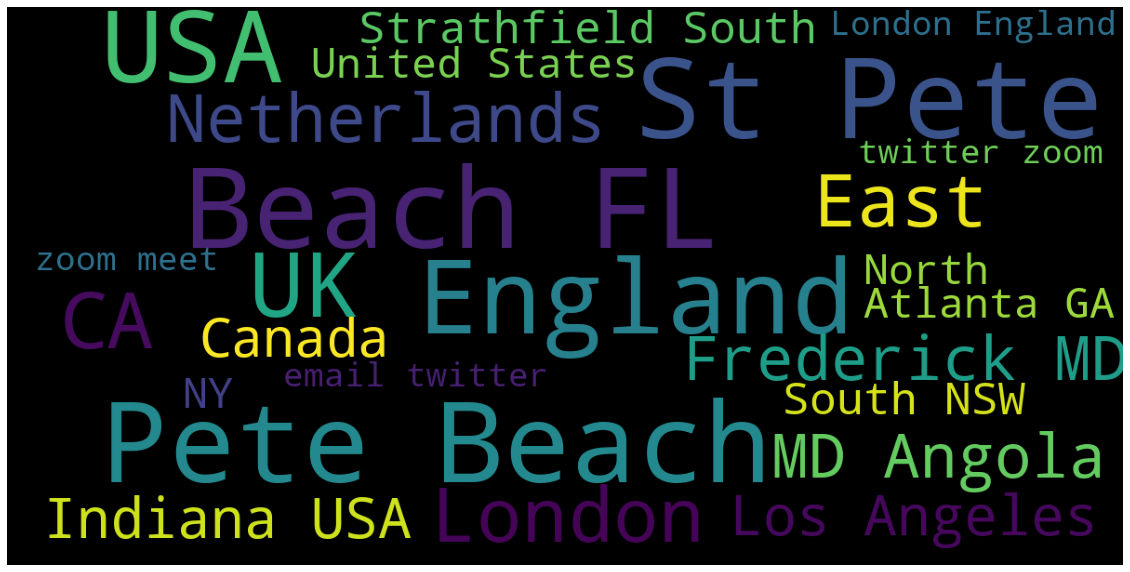

In [152]:
text = df.author_location

stopwords = set(STOPWORDS)

def nubeneuropsi(data, title = None):
    wordcloud = WordCloud(
                background_color='black',
                stopwords=stopwords,
                max_words=25,
                max_font_size=40,
                scale=3,
                random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
nubeneuropsi(df['author_location'].dropna())
        


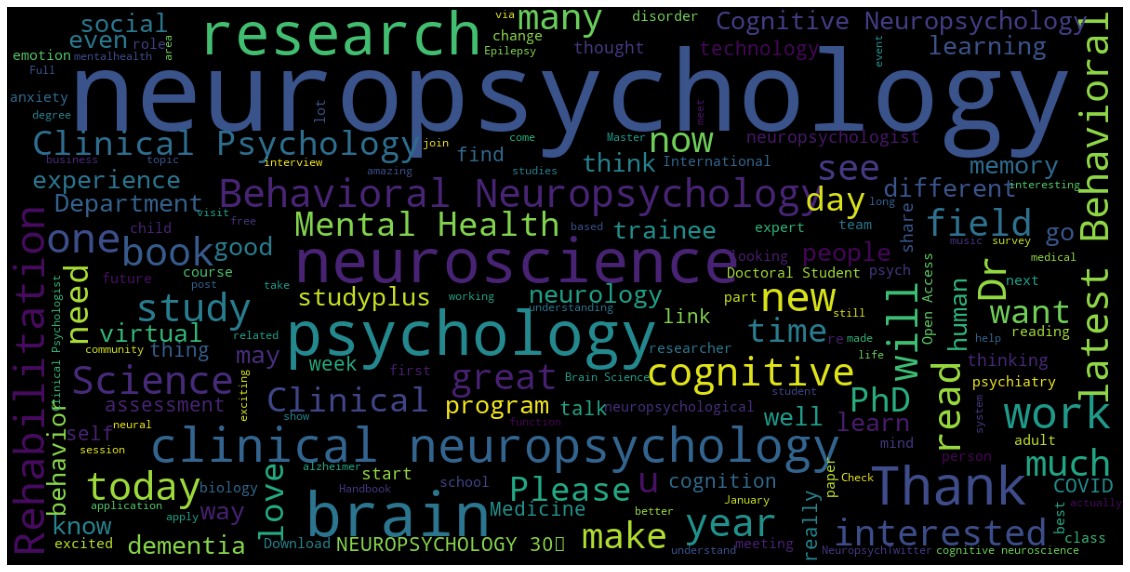

In [151]:
text = df.author_location

stopwords = set(STOPWORDS)

def nubeneuropsi(data, title = None):
    wordcloud = WordCloud(
                background_color='black',
                stopwords = ["https", r'\b\w{,6}\b', 'n', 's', 't', 'co', 'nhttps', 'm', 'amp', 'gt', 'lt'] + list(STOPWORDS),
                max_words=200,
                max_font_size=40,
                scale=3,
                random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

nubeneuropsi(df['text'].dropna())
        
